# INTRODUCTION
A store want to introduce a new promotion that provides a 40% discount on all purchases. We want to build a machine learning model that can predict which clients are likely to accept the offer. 



#### Problem Statement: 
The offer is only available to existing clients, who will be notified by phone. To save money, the marketing team wants to know how probable it is that a consumer will accept the offer and what factors might affect their decision.

#### About the Data:
The dataset consists historical consumer transaction information as well as their response to a previous discount offer.

Numeric Variables
- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- ID - Unique ID of each customer
- Year_Birth - Age of the customer
- Complain - 1 if the customer complained in the last 2 years
- Dt_Customer - date of customer's enrollment with the company
- Kidhome - number of small children in customer's household
- Teenhome - number of teenagers in customer's household
- Income - customer's yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company's website
- NumWebVisitsMonth - number of visits to company's website in the last month
- Recency - number of days since the last purchase

Categorical Variables
- Education - customer's level of education
- Marital - customer's marital status


Data Source: https://www.kaggle.com/datasets

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
# from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE

data = pd.read_csv('/Users/bfree/Downloads/superstore_data.csv')

In [100]:
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


# Exploratory Data Analysis

#### Descriptive Analysis

In [150]:
def check(df):
    print("Shape". center(82,'~'))
    print("Rows:{}".format(df.shape[0]))
    print("Columns:{}".format(df.shape[1]))
    print("Data Type". center(82,'~'))
    print(df.dtypes)
    print("Null Values". center(82,'~'))
    print(df.isnull().sum())
    print("Percentage Null Values". center(82,'~'))
    print((df.isnull().mean()*100).round(2))
    print("Duplicates". center(82,'~'))
    print(df.duplicated().sum())

check(data)



def check_variable(df):
    nunique_df = pd.DataFrame({'Variable':df.columns, 'Classes':[f'{df[i].nunique()} labels' for i in df.columns]})
    nunique_df = nunique_df.sort_values('Classes', ascending = False)
    nunique_df = nunique_df.reset_index(drop =True)
    return nunique_df
check_variable(data[['Marital_Status','Education']])

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Shape~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows:2240
Columns:22
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Data Type~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Null Values~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Id                      0
Year_Bir

,Variable,Classes
0,Marital_Status,8 labels
1,Education,5 labels


In [151]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [152]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [6]:
data.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Id,2240.0,5592.0,3247.0,0.0,2828.0,5458.0,8428.0,11191.0
Year_Birth,2240.0,1969.0,12.0,1893.0,1959.0,1970.0,1977.0,1996.0
Income,2216.0,52247.0,25173.0,1730.0,35303.0,51382.0,68522.0,666666.0
Kidhome,2240.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0
Recency,2240.0,49.0,29.0,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,304.0,337.0,0.0,24.0,174.0,504.0,1493.0
MntFruits,2240.0,26.0,40.0,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2240.0,167.0,226.0,0.0,16.0,67.0,232.0,1725.0
MntFishProducts,2240.0,38.0,55.0,0.0,3.0,12.0,50.0,259.0


#### Check correlation between the independent variables and the dependent variable (response)

/var/folders/z7/vnb500ls4xl36_q1tpnl0_y80000gn/T/ipykernel_3353/1703595077.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, ax=ax)


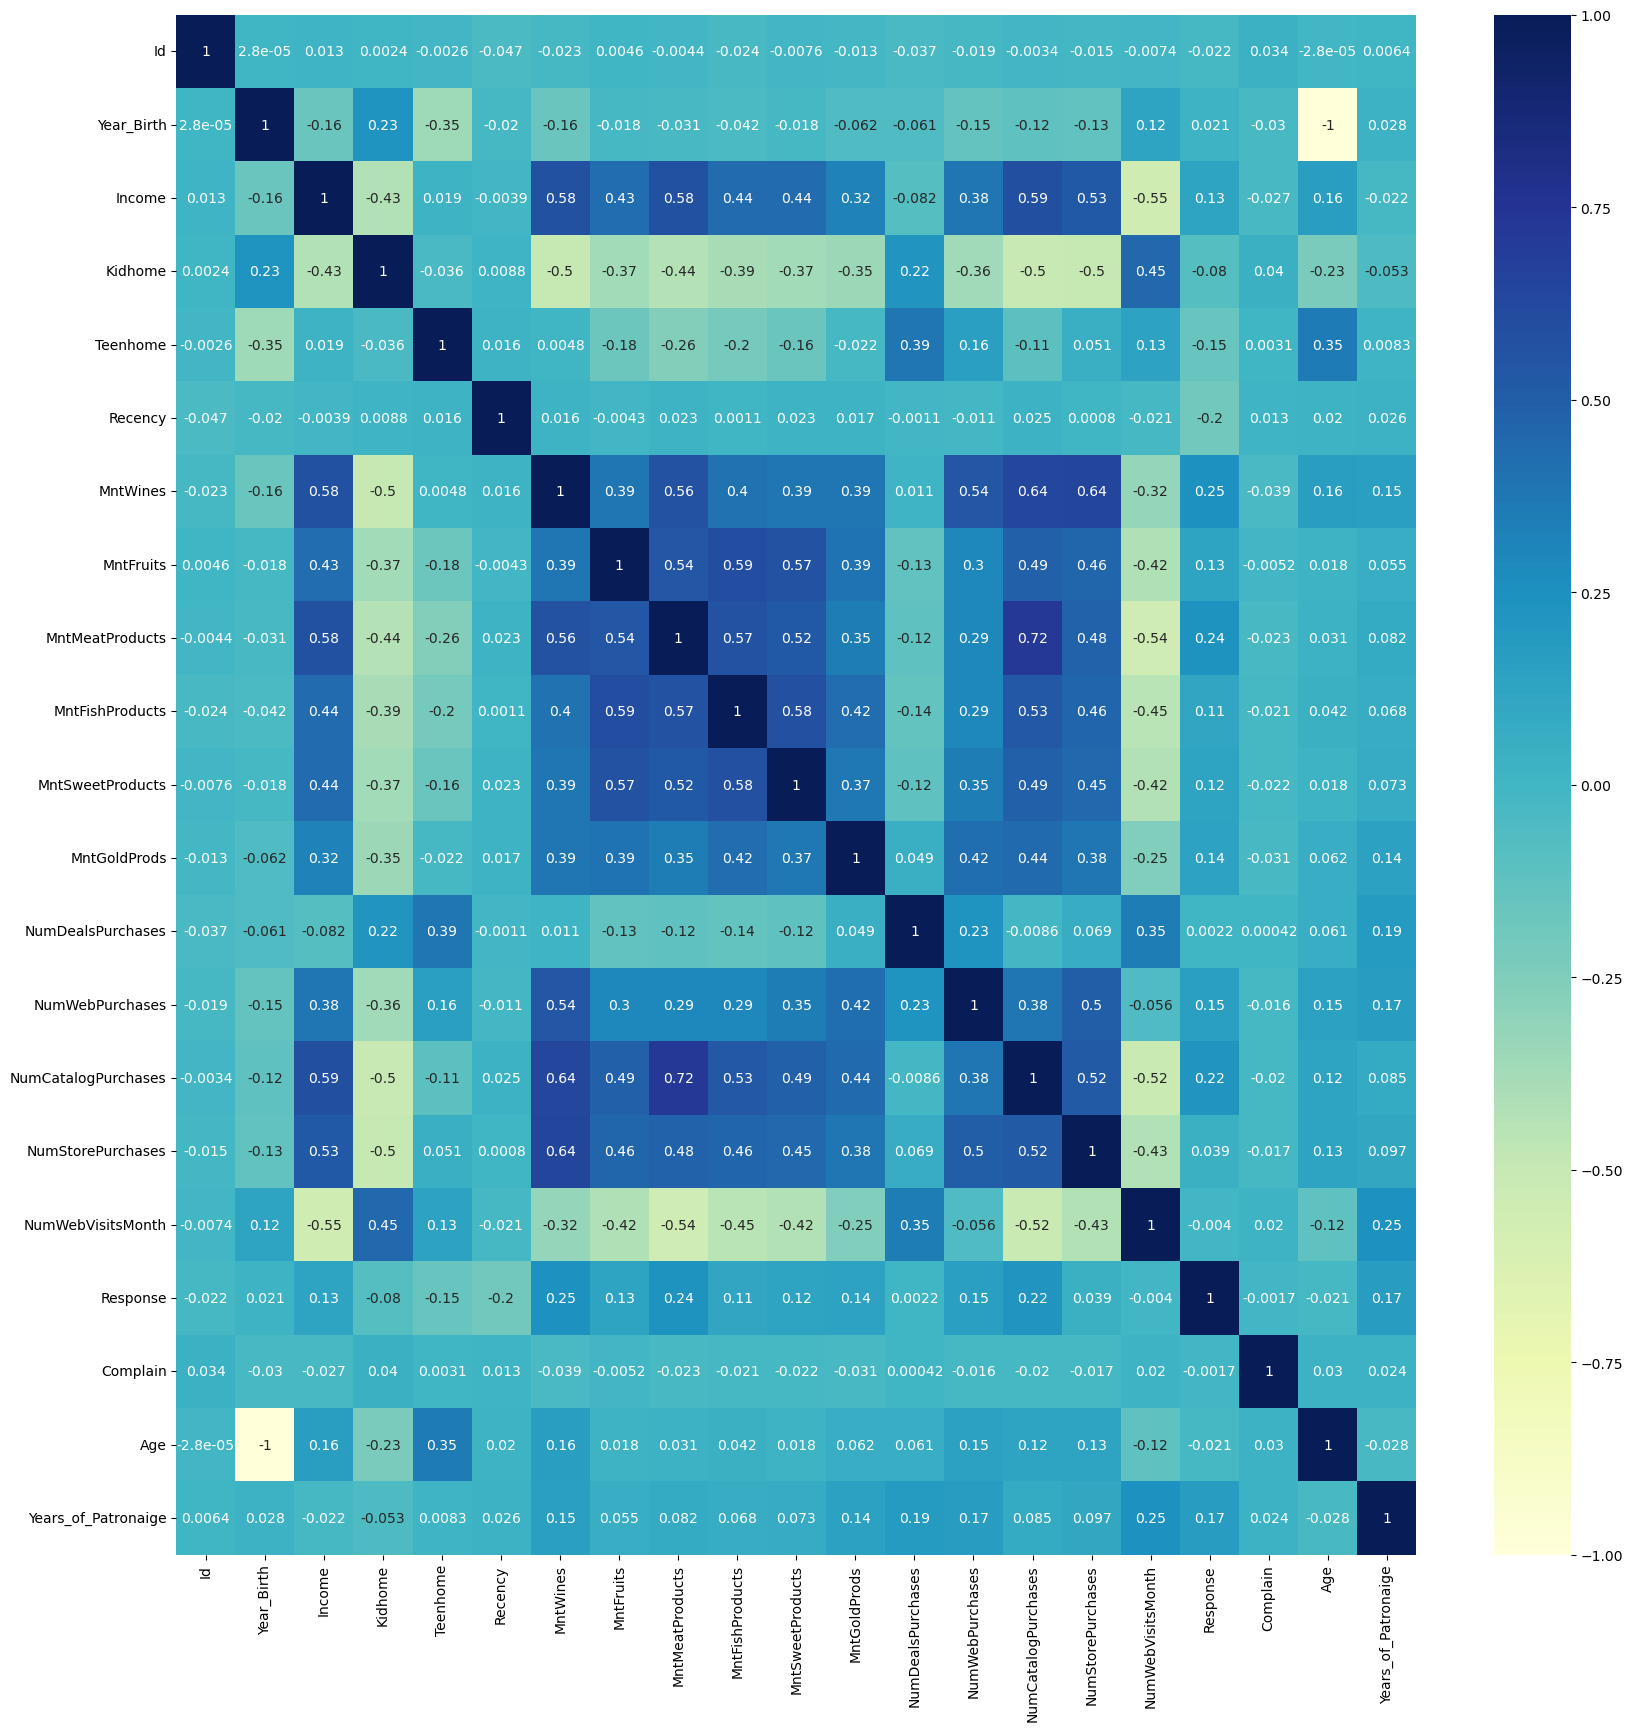

In [81]:

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, ax=ax)

plt.show()

In [183]:
from scipy import stats
# Taking care of missing values. 

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data[['Income']])
data[['Income']]= imputer.transform(data[['Income']])


#Get the correlation coefficient and p-value
corr_df = pd.DataFrame(columns= ['correlation_coef', 'p-value'])


for col in data:
    if pd.api.types.is_numeric_dtype(data[col]) and col != 'Response':
        r, p = stats.pearsonr(data['Response'], data[col])
        corr_df.loc[col] = [round(r, 3), round(p, 6)]

corr_df

,correlation_coef,p-value
Id,-0.022,0.298688
Year_Birth,0.021,0.313049
Income,0.133,0.000000
Kidhome,-0.080,0.000150
Teenhome,-0.154,0.000000
Recency,-0.198,0.000000
MntWines,0.247,0.000000
MntFruits,0.125,0.000000
MntMeatProducts,0.236,0.000000
MntFishProducts,0.111,0.000000


The correclation coefficient is the the estimated effect of an independent variable on the dependent variable. While the p-value indictates the significance. 

Null Hypothesis (Ho): There is no statistically significant relationship between the independent and dependent variable

Alternative Hypothesis (H1): There is a statistically significant relationship between the independent and dependent variable

For p-value equals to or less than 0.05, we do not accept the Null Hypothesis. Hence we conclude that there is a statistically significant relationship between the independent and dependent variable. I.e The indepedent variables have significant effect on the dependent variable.

We can decide to drop variables with no statistically significant relationship, and build the model using the ones a statistically significant relationship. However, we don't have to because the sklearn class that will be used to build the model will identify the best features


#### Visualizing the categorical variables

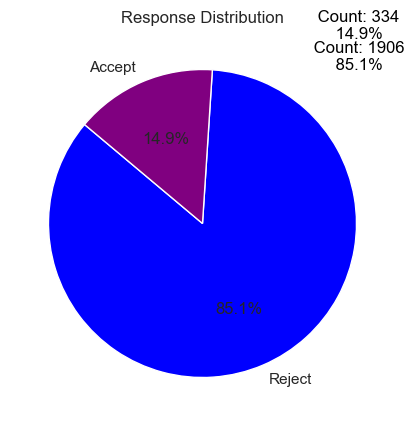

<Axes: xlabel='Years_of_Patronaige', ylabel='Count'>

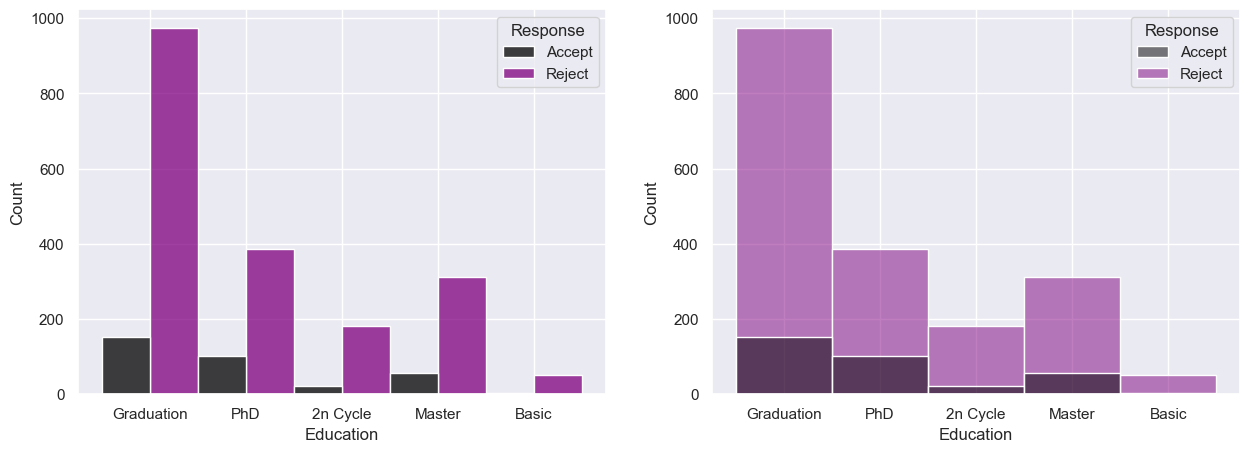

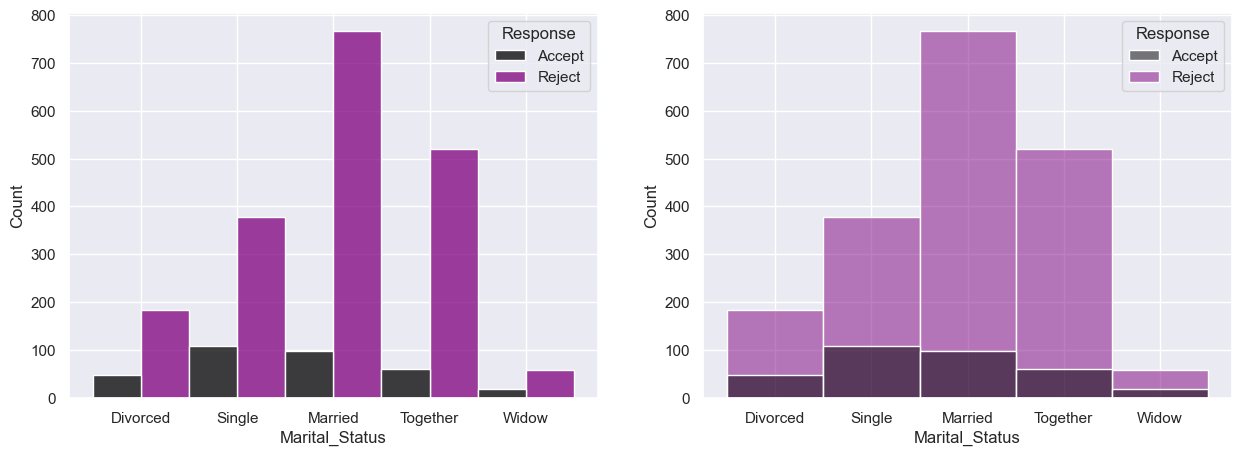

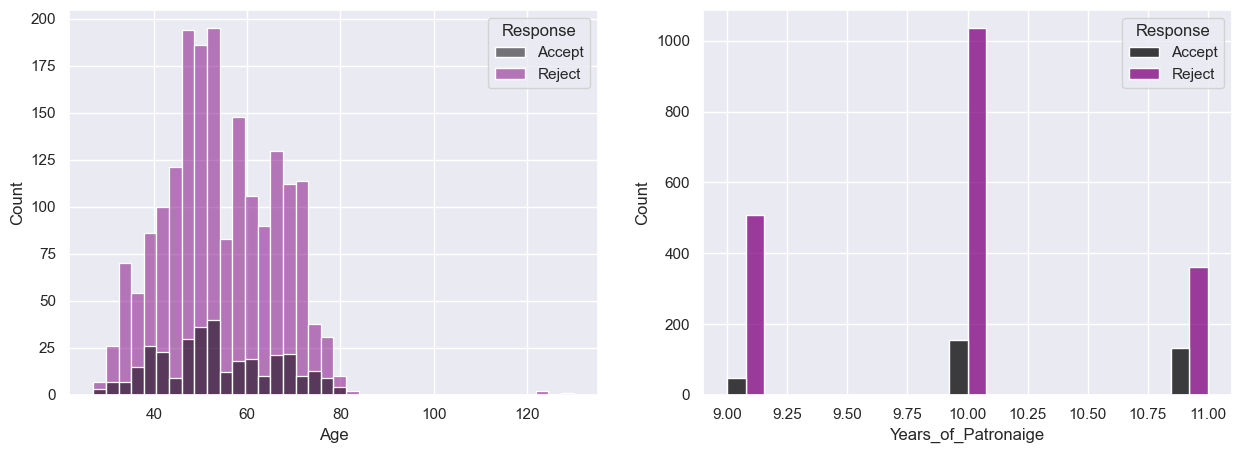

In [160]:

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data[['Income']])
data[['Income']]= imputer.transform(data[['Income']])

df2 = data.copy()

df2['Response'] = df2['Response'].map({0:'Reject',1:'Accept'})
df2['Marital_Status'] = df2['Marital_Status'].replace({'YOLO':'Single','Alone':'Single','Absurd':'Single'})

current_year = 2023
df2['Age'] = data['Year_Birth'].apply(lambda x: current_year - x)
df2['Years_of_Patronaige'] = (pd.to_datetime(data['Dt_Customer'])).dt.year.apply(lambda x: current_year - x)
df2['Income'] = data['Income'].apply(lambda x: int(x))




response_counts = data['Response'].value_counts()
labels = ['Reject','Accept']
colors = ['blue', 'purple']

plt.figure(figsize=(5, 5))  # Set the size of the pie chart
plt.pie(response_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)


plt.title("Response Distribution")

total_count = len(data['Response'])
for i, count in enumerate(response_counts):
    percent = count / total_count * 100
    plt.text(1, 1 + i * 0.2, f" Count: {count}\n {percent:.1f}%", fontsize=12, color='black', ha='center')
    
    
plt.show()



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df2, x="Education",palette=['black', 'purple'], hue="Response", multiple="dodge", ax=ax1)
sns.histplot(df2, x="Education",palette=['black', 'purple'], hue="Response", ax=ax2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df2, x="Marital_Status",palette=['black', 'purple'], hue="Response", multiple="dodge", ax=ax1)
sns.histplot(df2, x="Marital_Status",palette=['black', 'purple'], hue="Response", ax=ax2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df2, x="Age",palette=['black', 'purple'], hue="Response", ax=ax1)
sns.histplot(df2, x="Years_of_Patronaige",palette=['black', 'purple'], hue="Response",multiple="dodge", ax=ax2)


#### Visualizing the numeric veriables

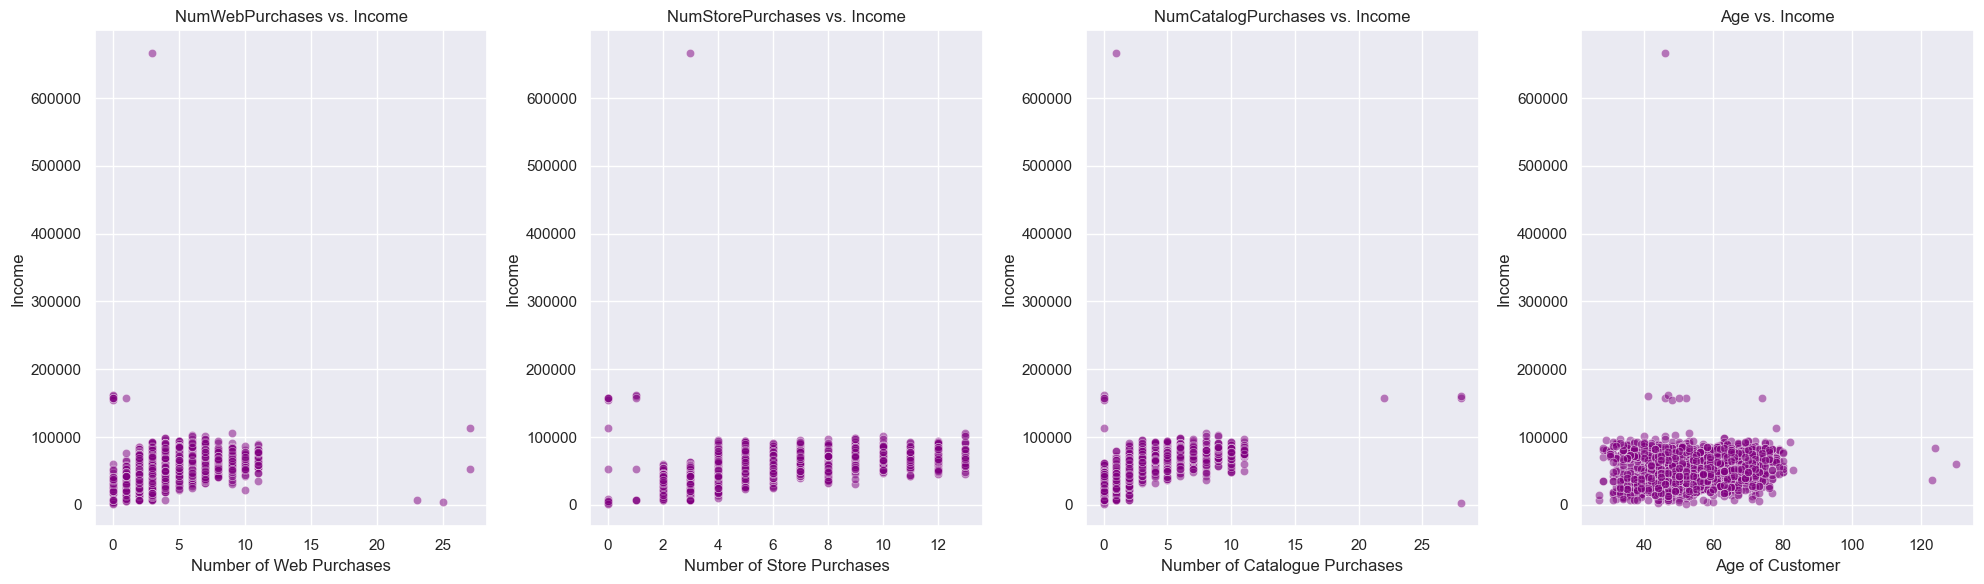

In [145]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))

sns.scatterplot(data=data,x="NumWebPurchases", y="Income",  ax=ax1,color='purple',alpha=0.5)

ax1.set_xlabel('Number of Web Purchases')
ax1.set_ylabel('Income')
ax1.set_title('NumWebPurchases vs. Income')


sns.scatterplot(data=data,x="NumStorePurchases", y="Income",  ax=ax2, color='purple', alpha=0.5)
ax2.set_xlabel('Number of Store Purchases')
ax2.set_ylabel('Income')
ax2.set_title('NumStorePurchases vs. Income')


sns.scatterplot(data=data,x="NumCatalogPurchases", y="Income",  ax=ax3, color='purple', alpha=0.5)
ax3.set_xlabel('Number of Catalogue Purchases')
ax3.set_ylabel('Income')
ax3.set_title('NumCatalogPurchases vs. Income')

sns.scatterplot(data=df2,x="Age", y="Income",  ax=ax4, color='purple', alpha=0.5)
ax4.set_xlabel('Age of Customer')
ax4.set_ylabel('Income')
ax4.set_title('Age vs. Income')


plt.tight_layout()

plt.show()

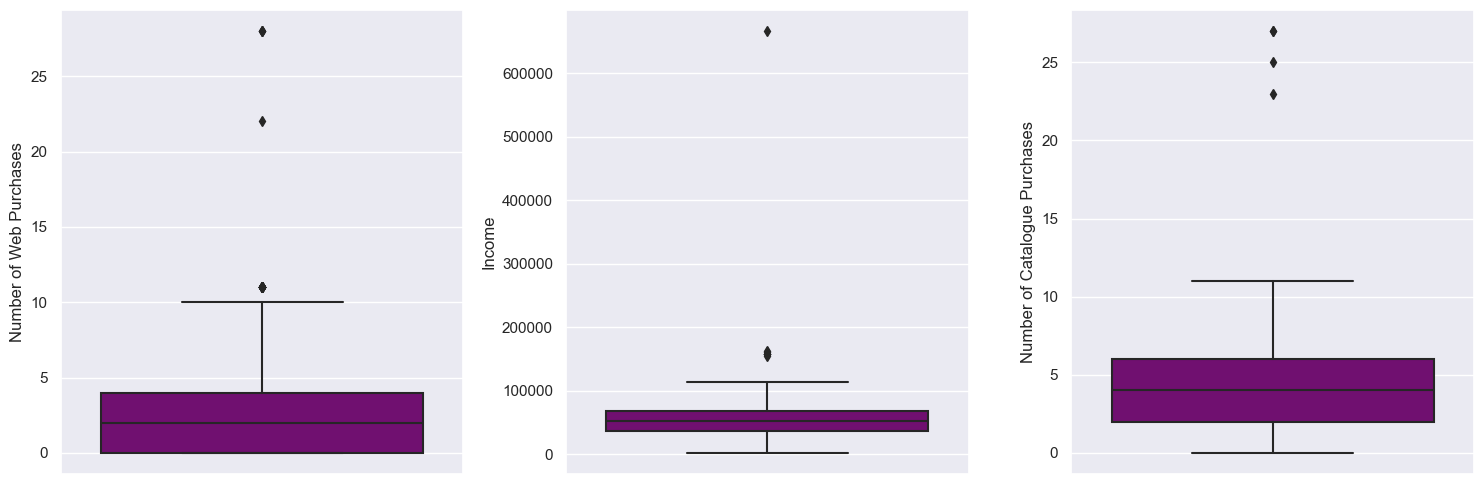

In [180]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=data, y="NumCatalogPurchases",  ax=ax1, color='purple')
ax1.set_ylabel('Number of Web Purchases')
# ax1.set_title('NumWebPurchases')

sns.boxplot(data=data, y="Income", ax=ax2, color='purple')
ax2.set_ylabel('Income')
# ax2.set_title('Income')

sns.boxplot(data=data, y="NumWebPurchases", ax=ax3, color='purple')
ax3.set_ylabel('Number of Catalogue Purchases')
# ax3.set_title('Income')



plt.tight_layout()

plt.show()


# Data Pre-processing

#### Dealing with missing values
Dealing with the missining data in the Income field. Since the missing data is just about 1% of the entire data we can drop the affected rows or replace the null value with the mean value of the observations in the field. We can decide to replace of the categories (Alone,Yolo,Absurd) in the Marital Status field with a more appropriate label.

In [187]:
# Taking care of missing values. 

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data[['Income']])
data[['Income']]= imputer.transform(data[['Income']])

In [188]:
data['Income'].isnull().sum()

0

In [189]:
data['Marital_Status'] = data['Marital_Status'].replace({
                                                          'Alone':  'Single', 
                                                          'YOLO':  'Single',
                                                          'Absurd':'Single'})

data['Marital_Status'].value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

#### Feature Engineering 

In [194]:
#Create age field subtracting birth year from current year
current_year = 2023
data['Age'] = data['Year_Birth'].apply(lambda x: current_year - x)
data['Years_of_Patronaige'] = (pd.to_datetime(data['Dt_Customer'])).dt.year.apply(lambda x: current_year - x)
data['Income'] = data['Income'].apply(lambda x: int(x))
data.head()


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Years_of_Patronaige
0,1826,1970,Graduation,Divorced,84835,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0,53,9
1,1,1961,Graduation,Single,57091,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0,62,9
2,10476,1958,Graduation,Married,67267,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0,65,9
3,1386,1967,Graduation,Together,32474,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56,9
4,5371,1989,Graduation,Single,21474,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,34,9


#### Split the data into dependent and independent variables

#### Encodiing

In [195]:
#Encodiing
encoded_data= pd.get_dummies(data, columns=['Marital_Status', 'Education'])
columns_to_remove = ['Year_Birth', 'Id', 'Dt_Customer']
encoded_data = encoded_data.drop(columns=columns_to_remove)

encoded_data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Years_of_Patronaige,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,84835,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1,0,53,9,1,0,0,0,0,0,0,1,0,0
1,57091,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1,0,62,9,0,0,1,0,0,0,0,1,0,0
2,67267,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,65,9,0,1,0,0,0,0,0,1,0,0
3,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56,9,0,0,0,1,0,0,0,1,0,0
4,21474,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,34,9,0,0,1,0,0,0,0,1,0,0


In [196]:
new_position = encoded_data.columns.get_loc('Response') + 13
feature_column = encoded_data.pop('Response')
encoded_data.insert(new_position, 'Response', feature_column)

x = encoded_data.iloc[:, :-1].values
y = encoded_data.iloc[:, -1].values




In [208]:
encoded_data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Years_of_Patronaige,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Response
0,84835,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,53,9,1,0,0,0,0,0,0,1,0,0,1
1,57091,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,62,9,0,0,1,0,0,0,0,1,0,0,1
2,67267,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,65,9,0,1,0,0,0,0,0,1,0,0,0
3,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,56,9,0,0,0,1,0,0,0,1,0,0,0
4,21474,1,0,0,6,16,24,11,0,34,2,3,1,2,7,0,34,9,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,66476,0,1,99,372,18,126,47,48,78,2,5,2,11,4,0,47,10,1,0,0,0,0,0,0,0,0,1,0
2236,31056,1,0,99,5,10,13,3,8,16,1,1,0,3,8,0,46,10,0,1,0,0,0,1,0,0,0,0,0
2237,46310,1,0,99,185,2,88,15,5,14,2,6,1,5,8,0,47,11,1,0,0,0,0,0,0,1,0,0,0
2238,65819,0,0,99,267,38,701,149,165,63,1,5,4,10,3,0,45,11,0,1,0,0,0,0,0,1,0,0,0


In [198]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Modeling

/Users/bfree/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.8556547619047619
Precision: 0.6538461538461539
Recall: 0.1619047619047619
F1-score: 0.25954198473282447

Confusion Matrix:


/Users/bfree/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


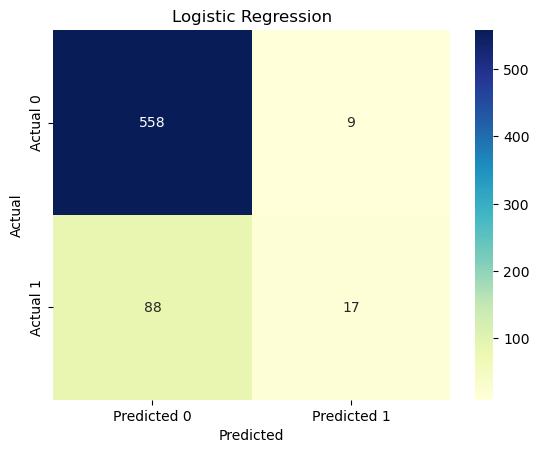



Model: Random Forest
Accuracy: 0.8616071428571429
Precision: 0.6428571428571429
Recall: 0.2571428571428571
F1-score: 0.36734693877551017

Confusion Matrix:


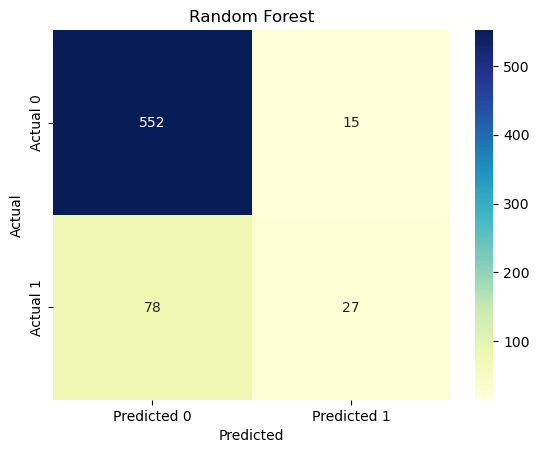



Model: SVM
Accuracy: 0.84375
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Confusion Matrix:


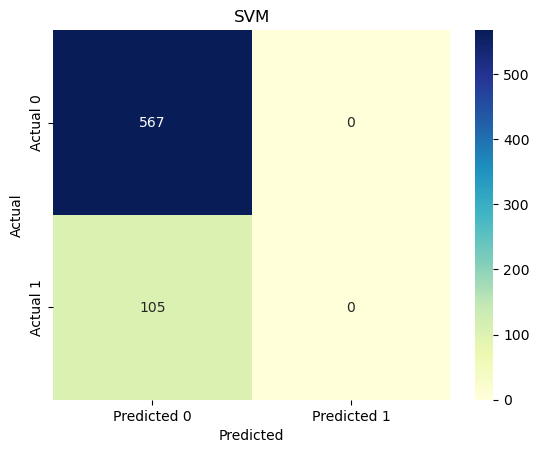

In [23]:
# Perform mean imputation on the feature matrix
imputer = SimpleImputer(strategy='mean')
# X_train_imputed = imputer.fit_transform(X_train)
# X_test_imputed = imputer.transform(X_test)

X_train_imputed = X_train
X_test_imputed = X_test

# Define the models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
]
results = []
for name, model in models:
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    conf_matrix = confusion_matrix(y_test, y_pred)
    results.append((name, accuracy, precision, recall, f1, conf_matrix))

# Display the results, confusion matrices, and additional statistics
for name, accuracy, precision, recall, f1, conf_matrix in results:
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}\n")

    print("Confusion Matrix:")
    df_confusion = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
    sns.heatmap(df_confusion, annot=True, fmt='d', cmap="YlGnBu")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name}')
    plt.show()
    print('\n')

#### Predicting a customer's response


In [249]:
pd.DataFrame(encoded_data.iloc[2235]).T

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Years_of_Patronaige,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Response
2235,66476,0,1,99,372,18,126,47,48,78,2,5,2,11,4,0,47,10,1,0,0,0,0,0,0,0,0,1,0


In [248]:
print(f" The actual response of this customer (2235) is '0' which indicates they rejected the offer.")
pd.DataFrame(encoded_data.iloc[2235]).T['Response']

 The actual response of this customer (2235) is '0' which indicates they rejected the offer.


2235    0
Name: Response, dtype: int64

In [250]:
customer_details = encoded_data.iloc[2235].drop('Response')
customer_details = customer_details.values.reshape(1, -1)

y_pred = RFC.predict(customer_details)
print(f" The predicted response of this customer (2235) is {y_pred}")


 The predicted response of this customer (2235) is [0]


# Findings

In the previous promotion, 2240 customers were contacted, 85.1% (1906) of them rejected the offer while 14.9% (334) of the customers accepted the offer. Majority (> 700) of the customers are married and over 900 of the customers have a 1st degree. Majority of the customers that accepted the over are between 46yrs - 55yrs. More than 1000 of the customers have been patronising the company for about 10 years. Outliers were spotted in some of the dependent variables.	

A test of correlation between the independent variables and the target variable (response) indicates that Income, KidIncome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts,MntGoldProds, NumDealsPurchases, NumWebPurchases and  NumCatalogPurchases, all have a p-value lower that 0.05 which indicates that there is a significant relationship between the independent variables and the target variable (response).

The dataset was used to train three models (Logistic Regression, Random Forest, and Support Vector Machine). The Random Forest Model has an accuracy rate of 86%. In other words, there is an 86% likelihood that the model will correctly forecast whether a customer will accept or reject an offer.